# L1 - ImageNet pretrained ResNets with STONEFLY9 dataset<br><br>Activations with hooks (work in progress)

In this notebook a ResNet34 trained on the [STONEFLY9 dataset](http://web.engr.oregonstate.edu/~tgd/bugid/stonefly9/) is used to visualize the activations of the network layers.<br>
The base notebook can be found here: https://github.com/MicPie/fastai_course_v3/blob/master/L1-stonefly.ipynb

## Notebook setup

In [1]:
# notebook setup
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# import fastai library
from fastai import *
from fastai.vision import *

## Data setup

In [3]:
# set path to data directory
path = Path('/home/paperspace/fastai/data/stonefly')

In [4]:
size = 224 # image size used for training (Note: is only applied when ds_tfms are set)
bs = 64 # batchsize for training

### Dataframe setup

In [5]:
# read in text file with a list of all the files
df = pd.read_csv(path/'files.txt', sep=' ', header=None, names=['imgurl'])

In [6]:
# define string manipulation lambda function to get path after the defined path variable
f = lambda x: x.split('/', 6)[-1]
df['imgurl'] = df['imgurl'].apply(f)

In [7]:
# define string manipulation lambda function to get data class
f = lambda x: x.split('/')[-3]
df['class'] = df['imgurl'].apply(f)

## Setup model with hooks without databunch

In [8]:
!gpustat --no-header

[0] Quadro P4000     | 31'C,   0 % |    10 /  8119 MB |


In [9]:
# setup classes list
classes = ['cal', 'dor', 'hes', 'iso', 'mos', 'pte', 'swe', 'yor', 'zap']

In [10]:
# create data bunch for prediction
data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=size).normalize(imagenet_stats)

In [11]:
# create learner
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Example from https://forums.fast.ai/t/share-your-work-here/27676/234:<br>
`last_layer = flatten_model(learn.model)[-3]
hook = hook_output(last_layer)
learn.model.eval()
n_valid = len(data.valid_ds.ds.y)
for i in range(n_valid):
    img,label = data.valid_dl.dl.dataset[i]
    img = apply_tfms(learn.data.valid_ds.tfms, img, **learn.data.valid_ds.kwargs)
    ds = TensorDataset(img.data[None], torch.zeros(1))
    dl = DeviceDataLoader.create(ds, bs=1, shuffle=False, device=learn.data.device, tfms=learn.data.valid_dl.tfms,
                                     num_workers=0)
    pred = learn.model(dl.one_batch()[0])
    if i % 1000 == 0:
        print(f'{i/n_valid*100:.2f}% ready')
    if i == 0 :
        acts = hook.stored 
    else : acts = torch.cat((acts,hook.stored), dim=0`

In [12]:
# flatten model to use layer list for hooks
layers = flatten_model(learn.model)# to set hook for a subset of layers use flatten_model(learn.model)[subset]

In [13]:
# number of layers used for the hook (see next cell)
len(layers)

100

In [14]:
custom_hook = hook_outputs(layers) #hoot_output (without 's') for single hook

In [15]:
# set model to evaluation mode
learn.model.eval();

In [16]:
# load trained weights
learn.load('stonefly_resnet34_stage_2')

In [17]:
!gpustat --no-header

[0] Quadro P4000     | 32'C,  11 % |   701 /  8119 MB | paperspace(691M)


### Load image for prediction

In [18]:
# set image number for prediction
img_num = 3036

In [19]:
# get image path
img_path = path/df.iloc[img_num,0]; img_path

PosixPath('/home/paperspace/fastai/data/stonefly/JPEG_lowRes/yor/set1/Yor_103-specimen-i004-s125.jpg')

In [20]:
# show image with matplotlib
#plt.imshow(plt.imread(img_path))

In [21]:
# open image from image path
img = open_image(img_path)

### Prediction

In [22]:
# make predict with model from a single image
learn.predict(img)

('yor',
 tensor(7),
 tensor([2.5390e-03, 2.0122e-04, 6.5139e-01, 1.9094e-01, 1.7272e-02, 4.7782e-02,
         5.3549e-02, 3.3347e+08, 5.1116e-01]))

### Look into the hooks from the prediction

In [23]:
# number of layers stored with the hooks
len(custom_hook.stored)

100

In [24]:
# show all stored layers
[custom_hook.stored[i].shape for i in range(len(custom_hook.stored))]

[torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 112, 112]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 64, 56, 56]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 28, 28]),
 torch.Size([1, 128, 

## Show image used for activations

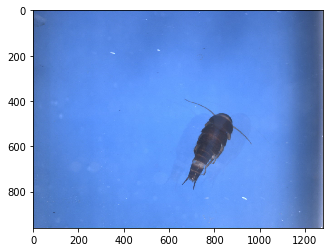

In [25]:
# show image with matplotlib
plt.imshow(plt.imread(img_path))

## Show activations

In [26]:
# set color map
cmap = 'inferno'

In [27]:
stored_hooks_rank = [len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))]#; stored_hooks_rank

In [28]:
min_rank = min([len(custom_hook.stored[i].shape) for i in range(len(custom_hook.stored))]); min_rank

2

In [29]:
first_flat_layer = stored_hooks_rank.index(min_rank); first_flat_layer

92

### Show 2D activations

In [30]:
# Show conv2d layer activation function
def show_2D_act(hook ,l=0, nrows=3, ncols=9, s=12, cmap=cmap):
    '''Show nrows*ncols activation visualizations of the l-th layer with figsize s*s'''
    fig, axes = plt.subplots(nrows, ncols, figsize=(s,s/3))
    fig.subplots_adjust(hspace=0.1, wspace=0, left=0, right=1, top=1, bottom=0)
    for i, ax in enumerate(axes.flat):
        ax.imshow(custom_hook.stored[l][0][i].cpu(), cmap=cmap)
        ax.set_axis_off()

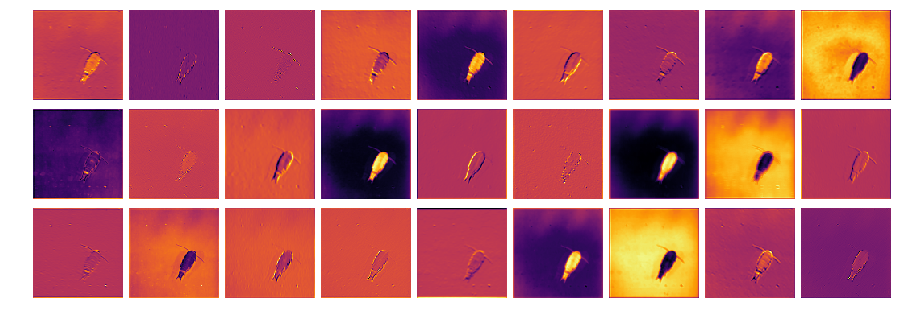

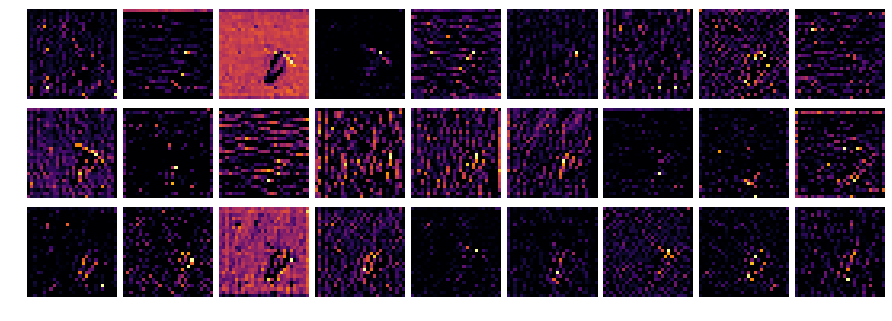

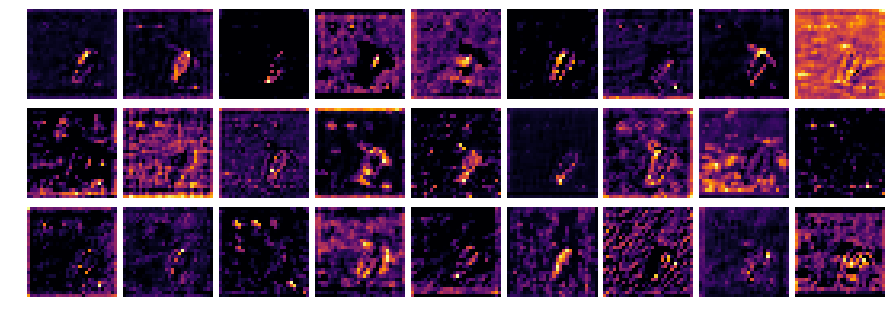

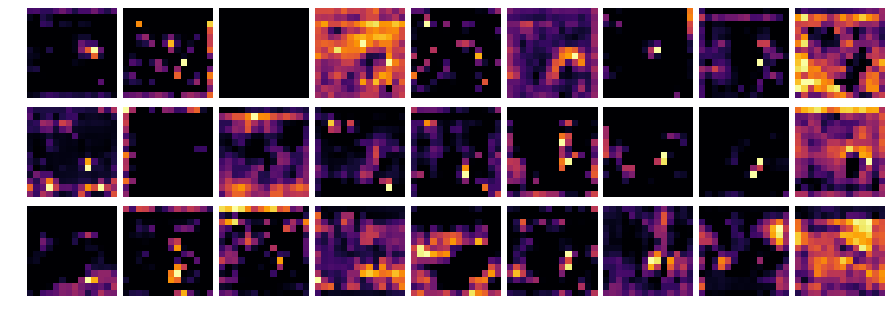

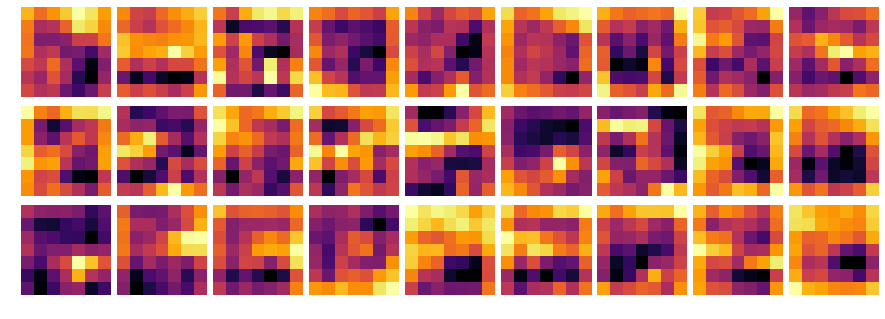

In [31]:
for i in range(0,first_flat_layer,20):
    #print('Layer#:',i) # Does not work? Will fix later.
    show_2D_act(custom_hook, i)

### Show flattened layer activations

In [32]:
# Show linear layer activation function
def show_1D_act(hook ,l=0, nrows=3, ncols=9, s=16, cmap=cmap):
    '''Show activation visualizations of the l-th linear layer with figsize s*s'''
    fig, ax = plt.subplots(figsize=(s,s/20))
    act_length = np.array(custom_hook.stored[l].cpu().numpy()).shape[-1]
    img_data = np.array([[custom_hook.stored[l][0].cpu().numpy()],]*20).reshape(20,act_length) # copy linear activation 20x for better visualization
    ax.imshow(img_data, cmap=cmap)
    ax.set_axis_off()

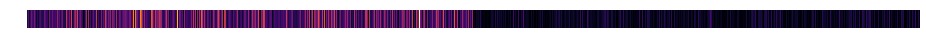

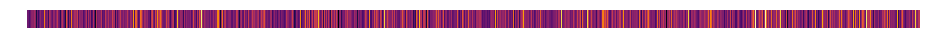

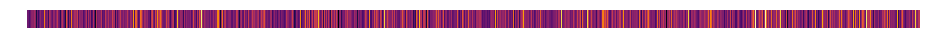

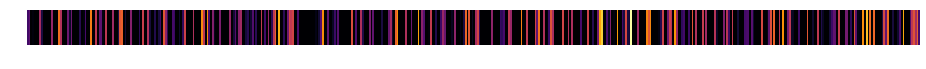

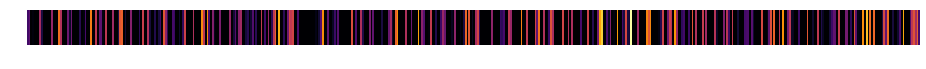

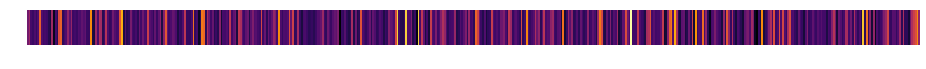

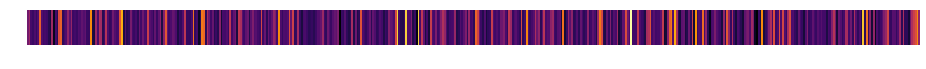

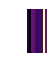

In [33]:
for i in range(first_flat_layer, len(custom_hook.stored)):
    show_1D_act(custom_hook, i)